#### SETUP

In [88]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["KERAS_BACKEND"] = "tensorflow"
seed = 42
keras.utils.set_random_seed(seed)
np.random.seed(seed)

#### DATA LOADING

In [108]:
def load_data(url_directory, url_file, resizeX=224, resizeY=224):
    X = []
    y = []
    
    with open(url_directory + url_file) as f:
        for line in f:
            line_split = line.split(",")
            img = cv2.imread(url_directory + line_split[0])
            img_resized = cv2.resize(img, (resizeX, resizeY))
            X.append(img_resized)
            y.append(int(line_split[2].strip()))

    return np.stack(X, axis=0), np.array(y)

In [109]:
url_directory = "../GroceryStoreDataset/dataset/"

X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

X_train, y_train = load_data(url_directory, "train.txt")
X_val, y_val = load_data(url_directory, "val.txt")
X_test, y_test = load_data(url_directory, "test.txt")

In [105]:
df_classes = pd.read_csv(url_directory + "classes.csv")
df_coarse = df_classes.loc[:, ['Coarse Class Name (str)', 'Coarse Class ID (int)']].drop_duplicates().values
labels_coarse = {i: lbl for lbl, i in temp_df.values}
labels_coarse

{0: 'Apple',
 1: 'Avocado',
 2: 'Banana',
 3: 'Kiwi',
 4: 'Lemon',
 5: 'Lime',
 6: 'Mango',
 7: 'Melon',
 8: 'Nectarine',
 9: 'Orange',
 10: 'Papaya',
 11: 'Passion-Fruit',
 12: 'Peach',
 13: 'Pear',
 14: 'Pineapple',
 15: 'Plum',
 16: 'Pomegranate',
 17: 'Red-Grapefruit',
 18: 'Satsumas',
 19: 'Juice',
 20: 'Milk',
 21: 'Oatghurt',
 22: 'Oat-Milk',
 23: 'Sour-Cream',
 24: 'Sour-Milk',
 25: 'Soyghurt',
 26: 'Soy-Milk',
 27: 'Yoghurt',
 28: 'Asparagus',
 29: 'Aubergine',
 30: 'Cabbage',
 31: 'Carrots',
 32: 'Cucumber',
 33: 'Garlic',
 34: 'Ginger',
 35: 'Leek',
 36: 'Mushroom',
 37: 'Onion',
 38: 'Pepper',
 39: 'Potato',
 40: 'Red-Beet',
 41: 'Tomato',
 42: 'Zucchini'}

In [87]:
print(f"The shape of the training set is {X_train.shape}")
print(f"The shape of the validation set is {X_val.shape}")
print(f"The shape of the testing set is {X_test.shape}")

The shape of the training set is (2640, 224, 224, 3)
The shape of the validation set is (296, 224, 224, 3)
The shape of the testing set is (2485, 224, 224, 3)


#### DATA INSPECTION

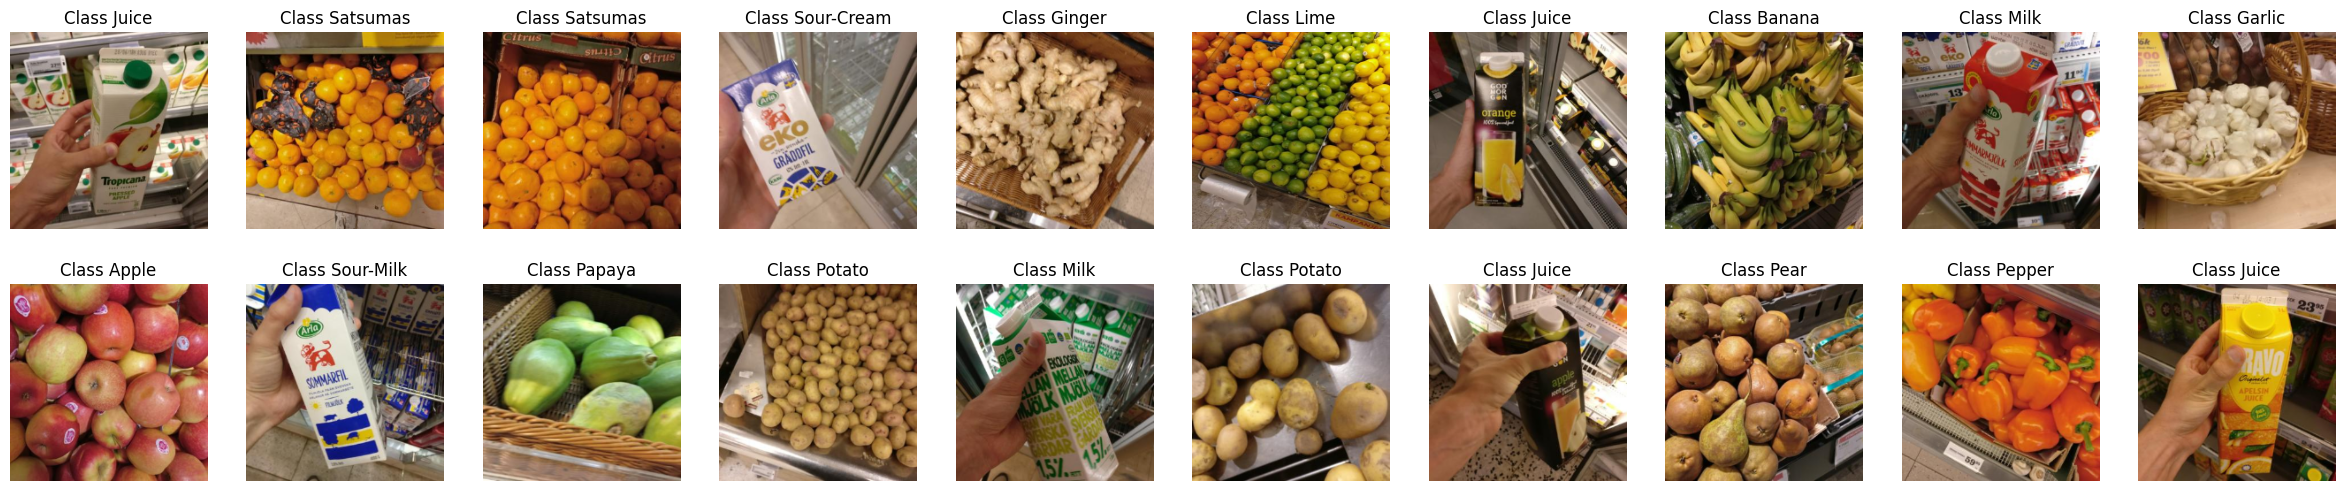

In [111]:
fig, ax = plt.subplots(2, 10, figsize=(30, 6))
ax = ax.ravel()
for i in range(20):
    rand_idx = np.random.randint(0, X_train.shape[0])
    ax[i].set_axis_off()
    ax[i].set_title(f"Class {labels_coarse[y_train[rand_idx]]}")
    ax[i].imshow(cv2.cvtColor(X_train[rand_idx], cv2.COLOR_BGR2RGB))

#### DATA NORMALISATION

#### MODEL BUILDING

#### MODEL TRAINING

#### MODEL EVALUATION